<a href="https://colab.research.google.com/github/LIONPANJSHIR/ML/blob/main/04California_houssing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

df = load_housing_data()

In [3]:
# ## mettre les variables en francais
# df.columns ['longitude', 'latitude', 'age_median_maison ', 'pieces_total',
#        'chambres_total', 'population', 'households', 'median_income',
#        'median_house_value', 'ocean_proximity']

In [4]:
df.head(10).style.set_sticky(axis="index")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.230000,37.880000,41.000000,880.000000,129.000000,322.000000,126.000000,8.325200,452600.000000,NEAR BAY
1,-122.220000,37.860000,21.000000,7099.000000,1106.000000,2401.000000,1138.000000,8.301400,358500.000000,NEAR BAY
2,-122.240000,37.850000,52.000000,1467.000000,190.000000,496.000000,177.000000,7.257400,352100.000000,NEAR BAY
3,-122.250000,37.850000,52.000000,1274.000000,235.000000,558.000000,219.000000,5.643100,341300.000000,NEAR BAY
4,-122.250000,37.850000,52.000000,1627.000000,280.000000,565.000000,259.000000,3.846200,342200.000000,NEAR BAY
5,-122.250000,37.850000,52.000000,919.000000,213.000000,413.000000,193.000000,4.036800,269700.000000,NEAR BAY
6,-122.250000,37.840000,52.000000,2535.000000,489.000000,1094.000000,514.000000,3.659100,299200.000000,NEAR BAY
7,-122.250000,37.840000,52.000000,3104.000000,687.000000,1157.000000,647.000000,3.120000,241400.000000,NEAR BAY
8,-122.260000,37.840000,42.000000,2555.000000,665.000000,1206.000000,595.000000,2.080400,226700.000000,NEAR BAY
9,-122.250000,37.840000,52.000000,3549.000000,707.000000,1551.000000,714.000000,3.691200,261100.000000,NEAR BAY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isnull().sum().sort_values(ascending=False)

,0
total_bedrooms,207
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


Statistiques descriptives

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


Cette base de donnée contient au total 20.640 observations
* La variable `housing_median_age` contient 207 valeurs **manquantes**
* Toutes les variables sont numérique sauf la variable `ocean_proximity` qui est une variable catégorielle
* Les variables numériques (hors variable de positions ) sont fortement asymétrique (longue traine a droite , skewness positive) comme nous pouvons l'observé sur la **figure 1.1**
* Une grande variances des variables sont observés aussi

In [9]:
df['ocean_proximity'].value_counts().to_frame().style.background_gradient(cmap='Blues')

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


La variable `ocean_proximity` est une variable catégorielle qui indique la proximité de chaque logement par rapport à l'océan. Le comptage des valeurs montre la distribution des logements dans les différentes catégories :

- **<1H OCEAN :** La catégorie la plus fréquente avec 9136 logements.
- **INLAND :** La deuxième catégorie la plus fréquente avec 6551 logements.
- **NEAR OCEAN :** Représente 2658 logements.
- **NEAR BAY :** Représente 2290 logements.
- **ISLAND :** La catégorie la moins fréquente avec seulement 5 logements.

Cette distribution indique que la majorité des logements se trouvent soit à moins d'une heure de l'océan, soit à l'intérieur des terres. La catégorie 'ISLAND' étant très peu représentée pourrait nécessiter une attention particulière lors de l'analyse ou de la modélisation.

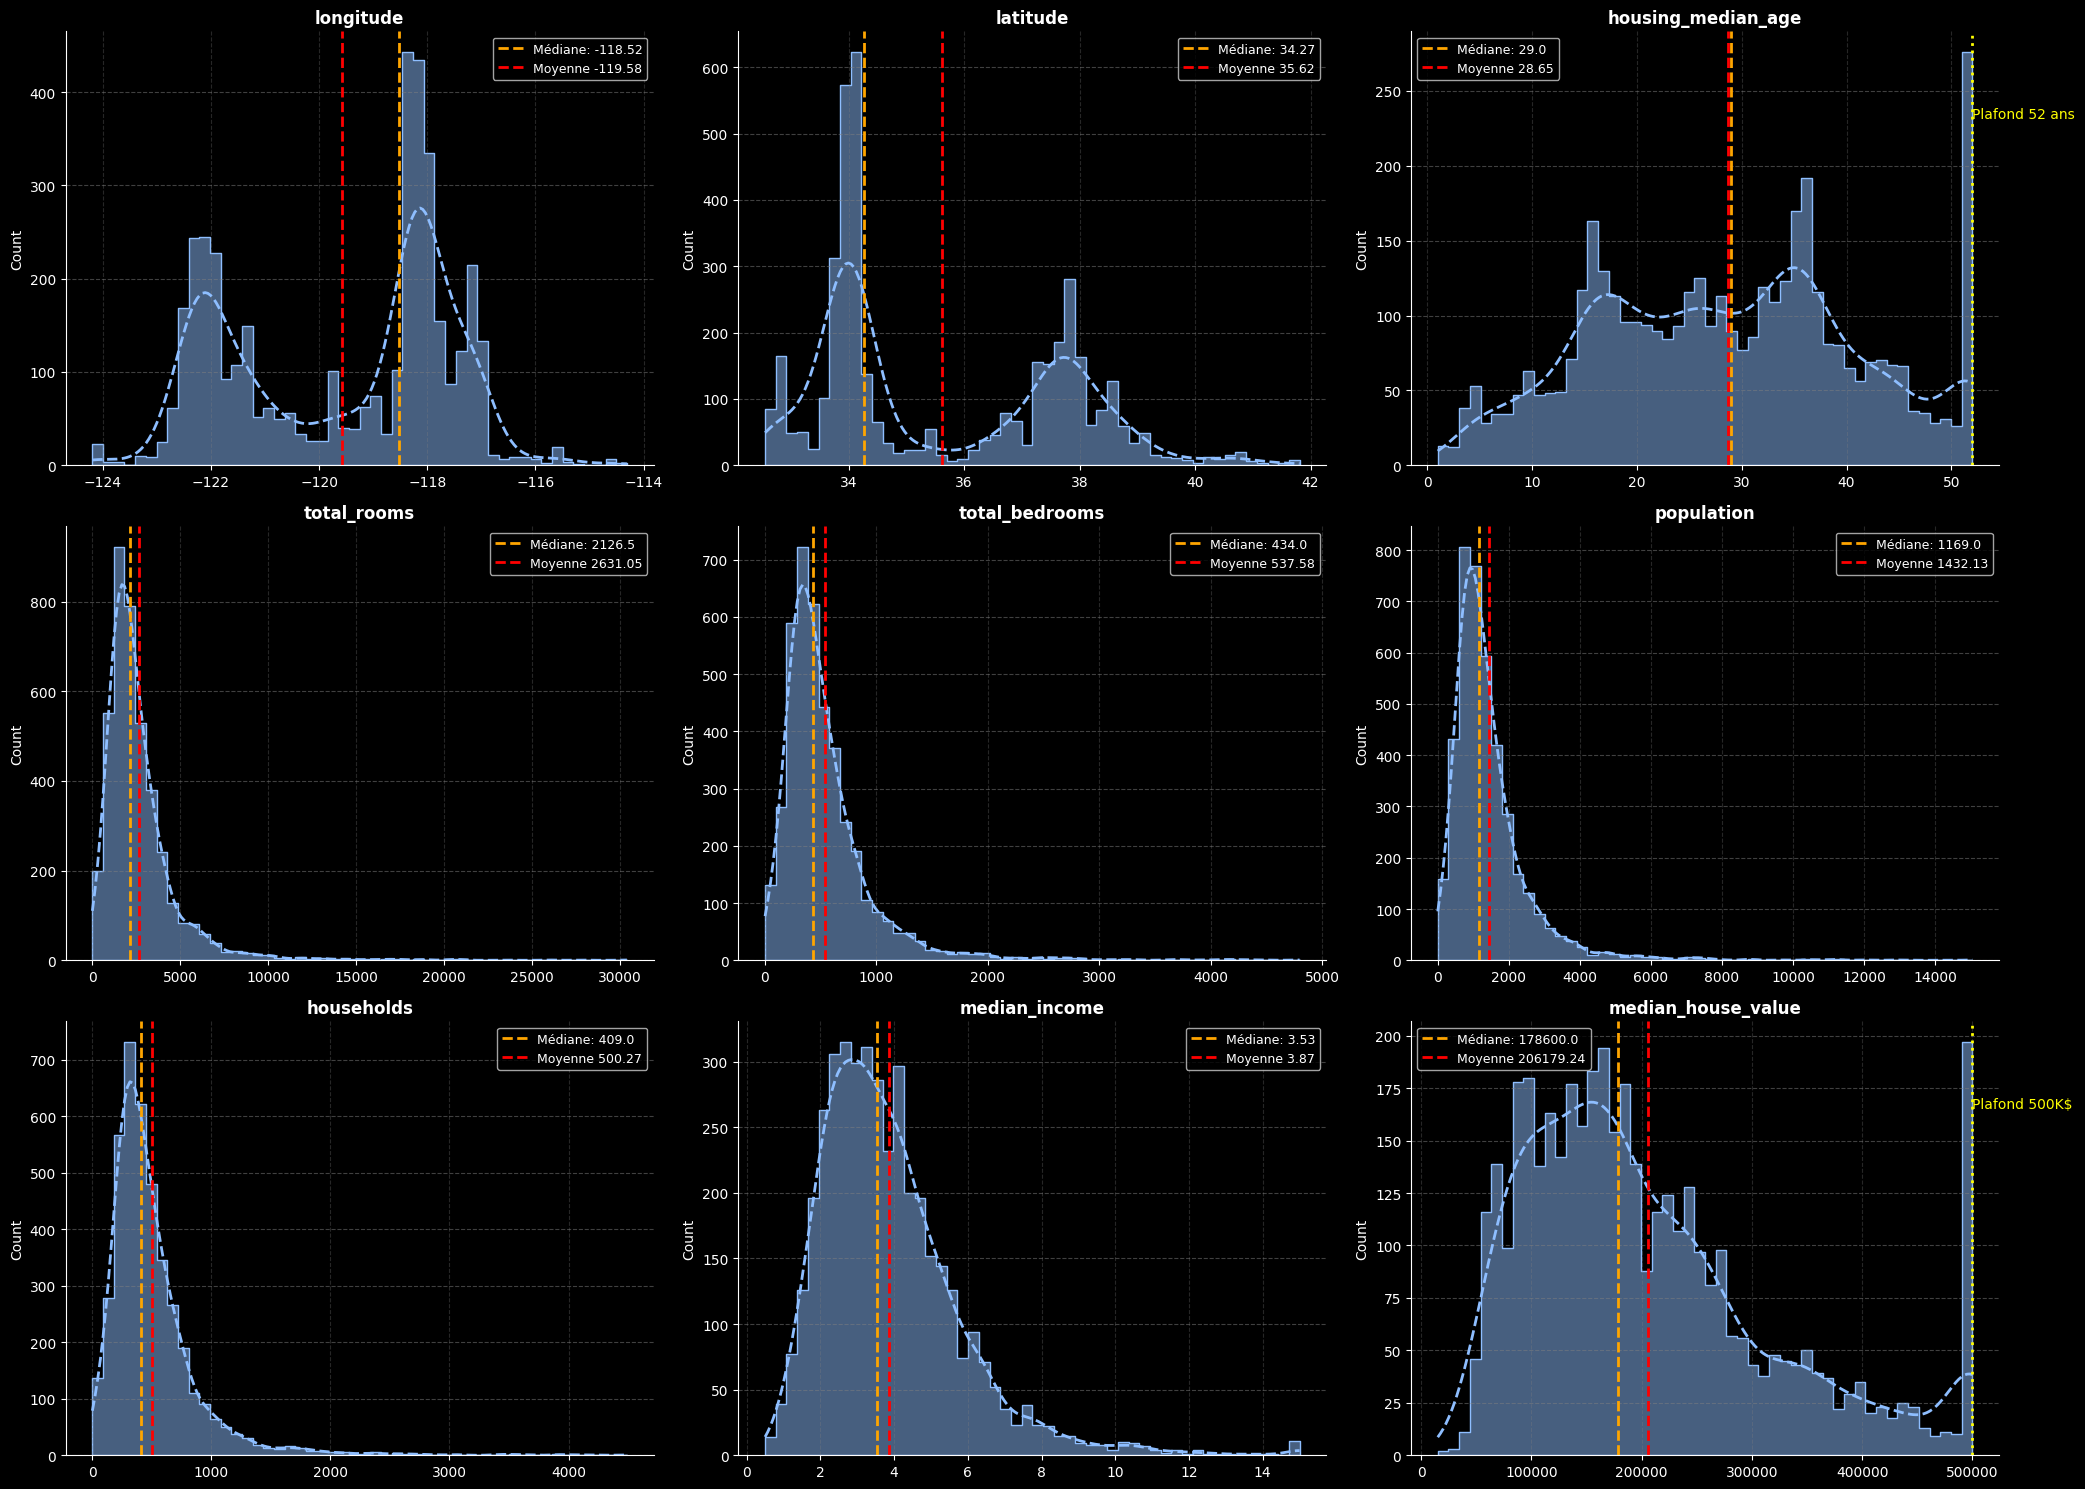

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("dark_background")
# sns.reset_defaults()

# Number of rows and columns for subplots
rows = len(df.select_dtypes(include='number').columns) // 3
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(21, 15))
axes = axes.flatten()  # flatten to 1D array pour facilier les iterations


for i, col in enumerate(df.select_dtypes(include='number').columns):
    sns.histplot(df[col], ax=axes[i], kde=True, color="#8EBEFF",bins=50 , line_kws={"linewidth": 2, "linestyle": "--"},element='step')
    median = np.round(df[col].median(),2)
    mean = np.round(df[col].mean(),2)
    axes[i].axvline(median, color='orange', linestyle='--', linewidth=2, label=f'Médiane: {median}')
    axes[i].axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Moyenne {mean}')
    axes[i].legend()
    axes[i].set_title(col, fontsize=12, fontweight="bold")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    for spines_vals ,spines in axes[i].spines.items():
      if spines_vals in ['top', 'right']:
          spines.set_visible(False)
    axes[i].xaxis.grid(ls="--" , alpha=0.3 , color ="gray")
    axes[i].yaxis.grid(ls="--" , alpha=0.5, color ="gray")
  # Annotation spéciale pour les variables plafonnées
    if col == "median_house_value":
        axes[i].axvline(500000, color="yellow", linestyle=":", linewidth=2)
        axes[i].text(500000, axes[i].get_ylim()[1]*0.8, "Plafond 500K$", color="yellow")

    if col == "housing_median_age":
        axes[i].axvline(52, color="yellow", linestyle=":", linewidth=2)
        axes[i].text(52, axes[i].get_ylim()[1]*0.8, "Plafond 52 ans", color="yellow")

    axes[i].legend(fontsize=9)

# # Hide unused subplots if any
# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [11]:
# df['housing_median_age'][df['housing_median_age'] > 50]


* **Les variables ne sont pas toutes sur la même échelle.**
  Certaines sont exprimées en milliers, d’autres en dizaines ou centaines de milliers, ce qui peut compliquer la comparaison directe des distributions.

* **`median_income` a été normalisée** : une unité correspond à environ **10 000 \$ de revenu médian**.
 Cela permet de travailler sur une variable continue plus compacte, mais il faut garder cette échelle en tête pour l’interprétation.

* **Certaines variables présentent un effet de plafonnement :**

  * `median_house_value` est limité à **500 000 \$**, ce qui traduit une **censure** des maisons les plus chères. Les prix supérieurs ne sont pas visibles, ce qui masque le segment haut de gamme du marché.
  * `housing_median_age` est limité à **52 ans**, ce qui regroupe toutes les maisons plus anciennes dans une seule catégorie. Cela **efface la diversité** du parc immobilier ancien (par exemple entre des maisons de 60 ans et des bâtiments historiques de 100 ans).



In [12]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# plt.style.use("dark_background")
# # sns.reset_defaults()

# # Number of rows and columns for subplots
# rows = len(df.select_dtypes(include='number').columns) // 3
# cols = 3

# fig, axes = plt.subplots(rows, cols, figsize=(21, 15))
# axes = axes.flatten()  # flatten to 1D array pour facilier les iterations


# for i, col in enumerate(df.select_dtypes(include='number').columns):
#     sns.boxplot(df[col], ax=axes[i])
#     axes[i].set_title(col, fontsize=12, fontweight="bold")
#     axes[i].set_xlabel("")
#     axes[i].set_ylabel("Count")
#     for spines_vals ,spines in axes[i].spines.items():
#       if spines_vals in ['top', 'right']:
#           spines.set_visible(False)
#     axes[i].xaxis.grid(ls="--" , alpha=0.3 , color ="gray")
#     axes[i].yaxis.grid(ls="--" , alpha=0.5, color ="gray")
#   # Annotation spéciale pour les variables plafonnées
#     if col == "median_house_value":
#         axes[i].axvline(500000, color="yellow", linestyle=":", linewidth=2)
#         axes[i].text(500000, axes[i].get_ylim()[1]*0.8, "Plafond 500K$", color="yellow")

#     if col == "housing_median_age":
#         axes[i].axvline(52, color="yellow", linestyle=":", linewidth=2)
#         axes[i].text(52, axes[i].get_ylim()[1]*0.8, "Plafond 52 ans", color="yellow")

#     axes[i].legend(fontsize=9)

# # # Hide unused subplots if any
# # for j in range(i + 1, len(axes)):
# #     fig.delaxes(axes[j])

# plt.tight_layout()
# plt.show()

In [13]:
from sklearn.model_selection import train_test_split
df["Houssing_cat"] = pd.cut(df["housing_median_age"],
                            bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                            labels=[1, 2, 3, 4, 5])
strat_train_set, strat_test_set = train_test_split(df, test_size=0.2, random_state=42, stratify=df["Houssing_cat"])

for df in (strat_train_set, strat_test_set):
    df.drop("Houssing_cat", axis=1, inplace=True)

Visualisations des données géographiques

In [14]:
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 32.2 MB/s eta 0:00:00


In [15]:
# axes = df.plot(
#     kind="scatter", x="longitude", y="latitude", grid=True,
#     s=df["population"] / 100, label="population",
#     c="median_house_value", cmap="viridis", colorbar=True,
#     legend=True, sharex=False, figsize=(10, 7)
# )

# # Supprimer le texte "median_house_value" sur le colorbar
# if axes.get_figure().axes[-1] != axes:  # le dernier axe est le colorbar
#     cbar = axes.get_figure().axes[-1]
#     cbar.set_ylabel("")  # supprime le label

# # Légende et axes
# leg = axes.legend(
#     title_fontsize=12,
#     fontsize=11,
#     loc="upper right",
#     frameon=True,
#     fancybox=True,
#     shadow=True,
#     facecolor="#0d1117",
#     edgecolor="white"
# )
# plt.setp(leg.get_texts(), fontfamily="serif", fontweight="bold", color="white", fontsize=10)
# leg.get_title().set_fontfamily("monospace")

# axes.set_xlabel("Longitude", fontsize=14)
# axes.set_ylabel("Latitude", fontsize=14)
# axes.set_title("Prix des maisons en fonction de la position géographique", fontsize=14, pad=20)
# axes.xaxis.grid(ls="--", alpha=0.3, color="gray")
# axes.yaxis.grid(ls="--", alpha=0.5, color="gray")
# for sp_name, sp in axes.spines.items():
#     if sp_name in ['top', 'right']:
#         sp.set_visible(False)

# plt.show()


In [16]:
import plotly.express as px

# Scatter interactif
fig = px.scatter_mapbox(
    df,
    lat="latitude",
    lon="longitude",
    size="population",
    color="median_house_value",
    color_continuous_scale="viridis",
    # opacity=.2,
    size_max=15,
    zoom=5,
    mapbox_style="carto-darkmatter",
    hover_name="median_house_value",
    hover_data={"population": True, "latitude": False, "longitude": False}
)

fig.update_layout(
    title="Prix des maisons en Californie",
    margin={"r":0,"t":50,"l":0,"b":0}
)
# fig.update_layout(
#     mapbox=dict(
#         center={"lat": 36.8, "lon": -119.5},  # centre approximatif de la Californie
#         style="carto-darkmatter"              # fond sombre, plus agréable visuellement
#     ),
#     title="Prix des maisons en Californie",
#     margin={"r":0,"t":50,"l":0,"b":0}
# )

fig.show()



- **Concentration géographique :** Les points représentent les logements, et leur concentration indique les zones de forte densité de population et de logements. On observe une concentration particulièrement marquée le long de la côte et dans les grandes zones métropolitaines.
- **Corrélation spatiale des prix :** La couleur des points représente la valeur médiane des maisons. On observe clairement que les valeurs des maisons sont plus élevées le long de la côte, en particulier dans le sud de la Californie (région de Los Angeles et San Diego) et dans la région de la Baie de San Francisco. Les zones intérieures ont tendance à avoir des valeurs de maisons plus basses.
- **Influence de la population sur la visualisation :** La taille des points est proportionnelle à la population du district. Cela permet de visualiser simultanément la densité de population et les prix des maisons. Les grandes villes avec une population élevée apparaissent comme de plus grands cercles.


### Corrélation

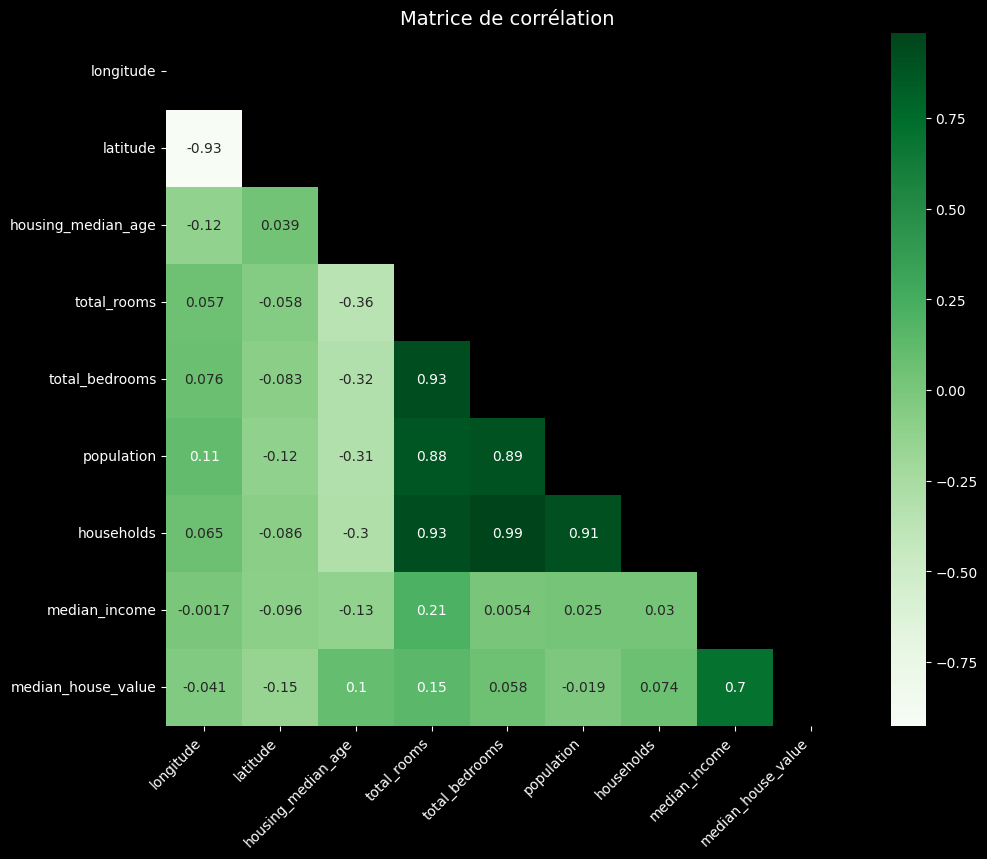

In [17]:
corr = df.select_dtypes(include='number').corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, annot=True, ax=ax,cmap="Greens")
ax.set_title("Matrice de corrélation", fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

La matrice de corrélation montre les relations linéaires entre les différentes variables numériques :

- **Corrélation positive élevée :**
    - `total_rooms`, `total_bedrooms`, `population` et `households` sont fortement corrélés positivement entre eux. Cela est logique car ces variables sont toutes liées à la taille et à la densité des districts.
    - `median_income` a une corrélation positive modérée avec `median_house_value` (0.70). Cela suggère que les districts avec des revenus médians plus élevés ont tendance à avoir des valeurs médianes de maisons plus élevées.

- **Corrélation négative élevée :**
    - `longitude` et `latitude` sont fortement corrélés négativement (-0.93), ce qui est attendu car ils représentent des coordonnées géographiques et se déplacent généralement dans des directions opposées en Californie.

- **Corrélation faible ou nulle :**
    - `longitude` et `latitude` ont des corrélations faibles avec `median_house_value`.
    - `total_bedrooms` a une corrélation positive faible avec `median_house_value` (0.058).
    - `population` a une corrélation négative faible avec `median_house_value` (-0.019).
    - `households` a une corrélation positive faible avec `median_house_value` (0.073).

- **Autres corrélations :**
    - `housing_median_age` a une faible corrélation positive avec `median_house_value` (0.10).
    - `total_rooms` a une faible corrélation positive avec `median_house_value` (0.15).

En résumé, le revenu médian (`median_income`) est la variable numérique la plus fortement corrélée positivement avec la valeur médiane des maisons (`median_house_value`). Les variables liées à la taille et à la densité (`total_rooms`, `total_bedrooms`, `population`, `households`) sont fortement corrélées entre elles mais n'ont qu'une faible corrélation avec la valeur médiane des maisons individuellement.

Median income vs median house value

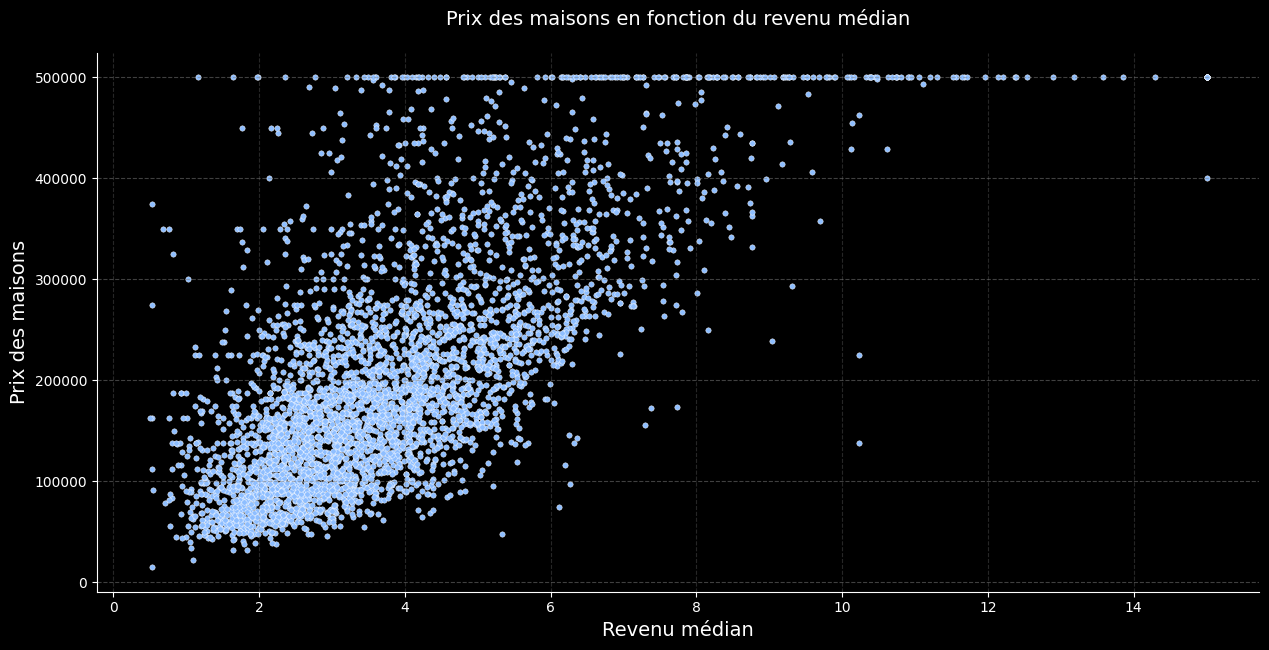

In [18]:
fig , axes = plt.subplots(figsize=(15,7))
sns.scatterplot(data = df,
                y = "median_house_value",
                x="median_income",
                color ="#8EBEFF",
                # edgecolor="red",
                s=15)
for spines_vals ,spines in axes.spines.items():
  if spines_vals in ['top', 'right']:
      spines.set_visible(False)

axes.xaxis.grid(ls="--", alpha=0.3, color="gray")
axes.yaxis.grid(ls="--", alpha=0.5, color="gray")
axes.set_title("Prix des maisons en fonction du revenu médian", fontsize=14, pad=20)
axes.set_xlabel("Revenu médian", fontsize=14)
axes.set_ylabel("Prix des maisons", fontsize=14)
plt.show()

Ce nuage de points illustre la relation entre le **revenu médian (`median_income`)** et la **valeur médiane des maisons (`median_house_value`)** dans les différents districts. Plusieurs observations ressortent :

* **Corrélation positive :** On constate une tendance claire : plus le revenu médian est élevé, plus la valeur médiane des maisons augmente. Cette relation positive confirme ce que suggérait la matrice de corrélation.

* **Forme de la relation :** La relation apparaît globalement **linéaire**, mais avec une dispersion notable des points, ce qui indique que d’autres facteurs interviennent également dans la détermination des prix des maisons.

* **Plafonnement à 500 000 \$ :** Une ligne horizontale dense se forme autour de 500 000 \$, illustrant l’effet de **censure de la variable `median_house_value`**. Toutes les maisons dont la valeur médiane dépasse ce seuil sont enregistrées à cette valeur maximale, ce qui masque la véritable distribution des maisons les plus chères.

* **Concentration pour les revenus faibles :** On observe que de nombreux points se concentrent sur les revenus médians plus bas, suggérant que l’ensemble de données contient davantage de districts à revenu médian faible.




## Préparations des données

### Nettoyage des données

In [19]:
# X = strat_train_set.drop("median_house_value", axis=1)
# y = strat_train_set["median_house_value"].copy()

In [79]:
from sklearn.impute import SimpleImputer
X_train = strat_train_set.drop("median_house_value", axis=1)
y_train = strat_train_set["median_house_value"].copy()
housing = X_train.copy()
housing_labels = y_train.copy()


### Valeurs manquantes

In [22]:
# imputer = SimpleImputer(strategy="median")
# X_num = X_train.select_dtypes(include='number')
# imputer.fit(X_num)
# X= imputer.transform(X_num)
# X = pd.DataFrame(X, columns=X_num.columns, index=X_num.index)


In [23]:
df_cat = X_train.select_dtypes(include='object')
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
df_cat_1hot = cat_encoder.fit_transform(df_cat)
df_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [24]:
# cat_encoder.categories_
# cat_encoder.feature_names_in_
# cat_encoder.get_feature_names_out()

In [25]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# # scaler.get_feature_names_out()
# # X_scaled=pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

In [26]:
# from sklearn.preprocessing import FunctionTransformer
# log_transformer = FunctionTransformer(np.log ,inverse_func = np.exp )
# log_pop = log_transformer.fit_transform(X[["population"]])
# # log_pop = pd.DataFrame(log_pop, columns=["log_population"], index=X.index)
# pd.concat([X['population'],log_transformer.inverse_transform(log_pop),log_pop ],axis=1)

In [27]:
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_selector
from sklearn.metrics.pairwise import rbf_kernel

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)

In [29]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

## Selectionner et entrainer un modèle de

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [31]:
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7e9...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e922bb18da0>)])),
                ('linearregression', LinearRegression())])

In [66]:
housing_prediction = lin_reg.predict(X_train)
from sklearn.metrics import mean_squared_error,median_absolute_error,r2_score
lin_mse = mean_squared_error(y_train, housing_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_mae = median_absolute_error(y_train, housing_prediction)
lin_r2 = r2_score(y_train, housing_prediction)
print(f"RMSE : {lin_rmse}")
# print(f"MSE : {lin_mse}")
print(f"MAE : {lin_mae}")
print(f"R2 : {lin_r2}")

RMSE : 69222.49818828993
MAE : 39756.27631068393
R2 : 0.6399927560078695


C'est mieux que rien mais il est clairement pas extraordinaire : pour la pluspart des sitrict les valeurs de `median_houssing_values` s'échelonnent  de  120.000\$ a 265.000\$ , c'est pourquoi une erruer de prediction (en moyenne) de 69.222\$ n'est pas satisfaisantes .
* Le modéle sous-ajuste les donné d'entrainement
* Les variables fournis sont peut être pas assez descriminants ou révélatrice d'information essentielle ou peu être notre modéle n'est juste pas assez puissantes

In [51]:
print(f"Les 5 premiers valeurs réelles {y_train[:5].values}")
print(f"Les 5 premiers valeurs predites {housing_prediction[:5].round(-2)}")
print(f"Les 5 premiers valeurs d'erreurs {y_train[:5].values - housing_prediction[:5].round(-2)}")

Les 5 premiers valeurs réelles [170700. 374200. 452100. 269100. 189900.]
Les 5 premiers valeurs predites [130500. 235100. 357900. 328800. 187700.]
Les 5 premiers valeurs d'erreurs [ 40200. 139100.  94200. -59700.   2200.]


* **RMSE = 69 222**
* **MAE = 39 756**
* **R² = 0,64**

---

### 📌 1. **RMSE (Root Mean Squared Error) : 69 222**

* Cela signifie que, en moyenne, l’écart quadratique entre la **valeur réelle** et la **valeur prédite** est d’environ **69 000 \$**.
* Plus le RMSE est faible, meilleure est la performance.
* Comme les prix médians des maisons dans le dataset tournent souvent entre **100 000 \$ et 500 000 \$**, une erreur de **69k** est **assez élevée**, mais pas catastrophique pour un premier modèle.

---

### 📌 2. **MAE (Mean Absolute Error) : 39 756**

* Ici, en moyenne absolue, ton modèle se trompe d’environ **40 000 \$** par maison.
* Le MAE est moins sensible aux grosses erreurs que le RMSE, donc il donne une meilleure idée de l’erreur typique.
* Exemple : si une maison vaut 200 000 \$, le modèle peut prédire en moyenne autour de **160 000 \$ ou 240 000 \$**.

---

### 📌 3. **R² (Coefficient of Determination) : 0,64**

* Le R² mesure la proportion de la variance expliquée par ton modèle.
* Ici, **64 % de la variabilité des prix est expliquée par ton modèle**.
* C’est **un score correct** pour un problème de régression avec des données réelles (pas parfait, mais loin d’être mauvais).
* Cela signifie aussi que **36 % des variations restent inexpliquées**, peut-être à cause de variables manquantes (ex. qualité de la maison, équipements, proximité des transports, etc.) ou d’un modèle trop simple.

---

### ✅ Conclusion

Ton modèle a une **performance correcte** : il explique une bonne partie de la variance (R² = 0,64), mais les erreurs restent élevées (MAE ≈ 40k, RMSE ≈ 69k).

👉 En pratique, cela veut dire que ton modèle peut donner une **tendance générale des prix** en Californie, mais pas une estimation très précise maison par maison.



In [56]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7e9...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e922bb18da0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [58]:
tree_prediction = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, tree_prediction)
tree_rmse = np.sqrt(tree_mse)
tree_mae = median_absolute_error(y_train, tree_prediction)
tree_r2 = r2_score(y_train, tree_prediction)
print(f"RMSE : {tree_rmse}")
print(f"MAE : {tree_mae}")
print(f"R2 : {tree_r2}")

RMSE : 0.0
MAE : 0.0
R2 : 1.0


Ceci n'est pas la bonne méthode

In [64]:
from sklearn.model_selection import cross_val_score
tree_rmse = -cross_val_score(tree_reg, housing, y_train,
                         scoring="neg_root_mean_squared_error", cv=10)

pd.Series(tree_rmse).describe()

,0
count,10.000000
mean,67187.112262
std,2425.609570
min,64314.626731
25%,65055.685523
50%,67437.886916
75%,67845.514264
max,71845.866626


In [67]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = make_pipeline(preprocessing, RandomForestRegressor(n_estimators=100, random_state=42))
forest_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7e9...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e922bb18da0>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [69]:
RF_rmse = -cross_val_score(forest_reg , X_train , y_train ,scoring="neg_root_mean_squared_error" , cv=10)


In [70]:
pd.Series(RF_rmse).describe()

,0
count,10.000000
mean,47278.617676
std,1390.279885
min,44436.192341
25%,46910.723158
50%,47446.179874
75%,47973.683738
max,49054.355994


In [72]:
from sklearn.svm import SVR
svm_reg = make_pipeline(preprocessing, SVR(kernel="linear"))
svm_reg.fit(X_train, y_train)
svm_rmse = - cross_val_score(svm_reg, housing, y_train,
                         scoring="neg_root_mean_squared_error", cv=10)
pd.Series(svm_rmse).describe()

,0
count,10.000000
mean,111739.442794
std,2537.452146
min,108061.955044
25%,110841.737448
50%,110916.526019
75%,112224.375382
max,117871.190210


In [71]:
from sklearn.svm import SVR
svm_reg = make_pipeline(preprocessing, SVR(kernel="rbf"))
svm_reg.fit(X_train, y_train)
svm_rmse = - cross_val_score(svm_reg, housing, y_train,
                         scoring="neg_root_mean_squared_error", cv=10)
pd.Series(svm_rmse).describe()

,0
count,10.000000
mean,118094.812490
std,2513.311814
min,114117.676447
25%,117042.113425
50%,117562.058375
75%,118640.703975
max,124014.668354


### Recherche par quadrillage

In [80]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7e922bb18da0>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [93]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

### Recherche aléatoire



## 🔎 1. Contexte

Quand on construit un modèle (ex. **RandomForest, XGBoost, SVM**…), il y a des **hyperparamètres** (nombre d’arbres, profondeur max, taux d’apprentissage, etc.) qu’on doit régler.
→ Leur choix influence fortement les performances.

---

## ⚙️ 2. Deux grandes méthodes de recherche

* **GridSearchCV** : teste **toutes les combinaisons possibles** dans une grille définie → précis, mais coûteux (explosion combinatoire).
* **RandomizedSearchCV** : tire **au hasard** un certain nombre de combinaisons d’hyperparamètres dans un espace défini → plus rapide, souvent presque aussi efficace.

---

## 🧪 3. Comment fonctionne RandomizedSearchCV ?

1. Tu définis :

   * les **paramètres** et leur **distribution** (plage de valeurs ou liste possible),
   * le **nombre d’itérations** (`n_iter`) = combien de combinaisons tester.
2. sklearn choisit **au hasard** des combinaisons.
3. Chaque combinaison est évaluée par **validation croisée**.
4. Le modèle avec les meilleurs résultats est retenu.

---

## 📊 5. Avantages et inconvénients

✅ **Avantages :**

* Plus rapide que GridSearch (pas besoin de tester tout l’espace).
* Peut trouver des bons hyperparamètres même dans un espace énorme.
* Flexible (on peut mettre des distributions continues, ex. `uniform(0.001, 0.1)` pour un learning rate).

❌ **Inconvénients :**

* Résultat dépend du hasard (mais on peut fixer `random_state`).
* Moins exhaustif que GridSearch.
* Nécessite de bien définir les plages de recherche (sinon on passe à côté du bon réglage).

---

👉 En résumé :
**RandomizedSearchCV explore au hasard un sous-ensemble d’hyperparamètres et garde la meilleure combinaison trouvée.**
C’est un bon compromis entre performance et coût de calcul, surtout quand l’espace des paramètres est grand.




In [97]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'preprocessing__geo__n_clusters':randint(low=3,high=50),
                  'random_forest__max_features':randint(low=2 , high=20)}

rnd_search = RandomizedSearchCV(full_pipeline , param_distributions= param_distribs, n_iter=10 , cv=3 , scoring='neg_root_mean_squared_error' , random_state=42,n_jobs=-1)
rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e922656eae0>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e922656f2c0>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [100]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
# configure the search
search = HalvingRandomSearchCV(full_pipeline, param_distribs, n_candidates=10, factor=2, min_resources=100, max_resources=500, n_jobs=-1, scoring='neg_root_mean_squared_error', cv=5, random_state=42)

# execute search
result = search.fit(X_train, y_train)

### Analysons le modéle et leurs erreurs

In [101]:
rnd_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7e922ae...
                                                  ClusterSimilarity(n_clusters=45,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e92265590a0>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=9, random_state=42))])

In [104]:
# rnd_search.best_params_
# rnd_search.best_score_ , search.best_score_

(np.float64(-42765.342425979004), np.float64(-61978.01674852887))

In [119]:
final_model = rnd_search.best_estimator_
feature_importances = final_model["random_forest"].feature_importances_
sorted(zip(feature_importances,final_model["preprocessing"].get_feature_names_out() ),reverse=True)
feature_importances = pd.DataFrame(feature_importances,index=final_model["preprocessing"].get_feature_names_out(),columns=["importance"]).sort_values(by="importance",ascending=False)

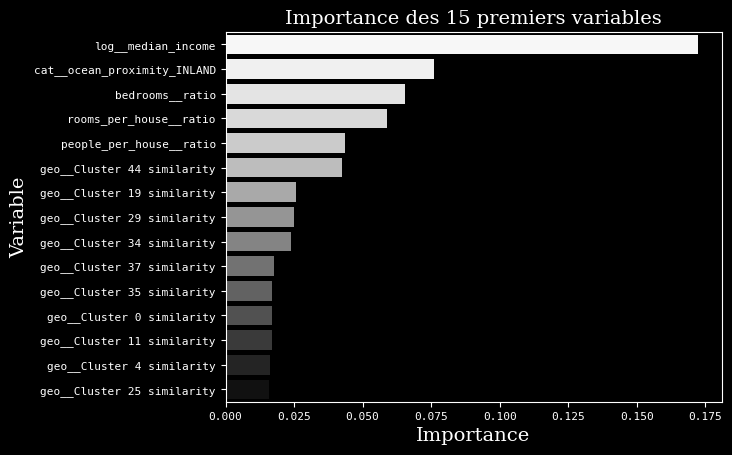

In [142]:
sns.barplot(data=feature_importances.iloc[:15,:],y=feature_importances.iloc[:15,:].index,x="importance",palette="Grays")
plt.title("Importance des 15 premiers variables",fontsize=14,fontfamily="serif")
plt.xlabel("Importance",fontsize=14,fontfamily="serif")
plt.ylabel("Variable",fontsize=14 , fontfamily="serif")
plt.yticks(fontsize=8,fontfamily="monospace")
plt.xticks(fontsize=8,fontfamily="monospace")
plt.show()

### Evaluations sur le jeu de test

In [143]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
#

In [145]:
final_predicition = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predicition)
final_rmse = np.sqrt(final_mse)
final_mae = median_absolute_error(y_test, final_predicition)
final_r2 = r2_score(y_test, final_predicition)
print(f"RMSE : {final_rmse}")
print(f"MAE : {final_mae}")
print(f"R2 : {final_r2}")


RMSE : 39177.438996176425
MAE : 15334.5
R2 : 0.8849102294785527


In [146]:
from scipy import stats
confidence = 95
squared_erros = (final_predicition - y_test)**2
np.sqrt(stats.t.interval(confidence/100, len(squared_erros)-1,
                         loc=squared_erros.mean(),
                         scale=stats.sem(squared_erros)))

array([37198.43807531, 41061.16970272])

In [147]:
# sauvegarde du model
import joblib
joblib.dump(final_model, "my_california_housing_model.pkl")

['my_california_housing_model.pkl']

In [148]:
from google.colab import drive; drive.mount('/content/drive')

Mounted at /content/drive


In [153]:
!cp /content/my_california_housing_model.pkl /content/drive/Mon drive/Monporfolio/projet/model/

cp: target 'drive/Monporfolio/projet/model/' is not a directory


In [154]:
# Create the target directory in Google Drive if it doesn't exist
!mkdir -p "/content/drive/My Drive/Monporfolio/projet/model/"

# Copy the model to the target directory
!cp "/content/my_california_housing_model.pkl" "/content/drive/My Drive/Monporfolio/projet/model/"